# simple 2 layer  neural network for XOR gate from scratch
Feed forwad equations
\begin{align*}
&z^1 = w^1 x + b^1 \\
&a^1 = f(z^1) \\
&z^2 = w^2 a^1 + b^2 \\
&a^2 = f(z^2) 
\end{align*}

$$
\begin{pmatrix} 
  0 & 0 & 1  & 1 \\
  0 & 1 & 0  & 1 \\
\end{pmatrix}
$$

loss fuction: cross entropy loss (binary classfication in this case)
$$
l = -\frac{1}{N} {(y \cdot \log(a^2) + (1-y) \cdot \log(1-a^2)))}
$$
Where N is number of training data, y is the true label, $a^2$ is output of the network.

Backpropagation Equations
\begin{align*}
&\frac{\partial l}{\partial a^2} = \frac{a^2-y}{a^2 (1-a^2)} \\
&\frac{\partial a^2}{\partial z^2} = f(z^2) \cdot (1-f(z^2)) = a^2 (1-a^2) \\
&\frac{\partial l}{\partial z^2} = \frac{\partial l}{\partial a^2} \cdot \frac{\partial a^2}{\partial z^2} = (a^2 -y)
\end{align*}

\begin{align*}
&\frac{\partial l}{\partial w^2} =  \frac{\partial l}{\partial z^2} \cdot \frac{\partial z^2}{\partial w^2} = (a^2 -y)(a^1)^T \\
&\frac{\partial l}{\partial b^2} =  \frac{\partial l}{\partial z^2} \cdot \frac{\partial z^2}{\partial b^2} = (a^2 -y) \cdot 1
\end{align*}

\begin{align*}
&\frac{\partial l}{\partial a^1} = \frac{\partial l}{\partial z^2} \cdot \frac{\partial z^2}{\partial a^1} = (w^2)^T(a^2 -y) \\
&\frac{\partial l}{\partial z^1} = \frac{\partial l}{\partial a^1} \cdot \frac{\partial a^1}{\partial z^1} = (w^2)^T(a^2 -y) \cdot a^1(1-a^1) 
\end{align*}



\begin{align*}
&\frac{\partial l}{\partial w^1} = \frac{\partial l}{\partial z^1} \cdot \frac{\partial z^1}{\partial w^1} = (w^2)^T(a^2 -y) \cdot a^1(1-a^1) \cdot X^T \\
&\frac{\partial l}{\partial b^1} = \frac{\partial l}{\partial z^1} \cdot \frac{\partial z^1}{\partial b^1} = (w^2)^T(a^2 -y) \cdot a^1(1-a^1) \cdot 1
\end{align*}

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Defining the Neural Network for XOR
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        np.random.seed(314)
        self.theta1 = np.random.rand(hidden_size, input_size).astype(np.float32)
        self.theta2 = np.random.rand(output_size, hidden_size).astype(np.float32)
        self.bias1 = np.random.rand(hidden_size,1).astype(np.float32)
        self.bias2 = np.random.rand(output_size,1).astype(np.float32)
       
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward_run(self, input):
        # print(f"theta1_input: {self.theta1}  bias1:{self.bias1} theta2: {self.theta2} bias2:{self.bias2}")
        z1 = np.dot(self.theta1, input) + self.bias1
        a1 = self.sigmoid(z1)
        z2 = np.dot(self.theta2, a1) + self.bias2
        a2 = self.sigmoid(z2)
        return a2, a1
    
    def back_propagate(self, input, output, a2, a1):
        N = input.shape[0]
        delta_a2 = (a2 - output)/(a2*(1-a2))
        delta_z2 = delta_a2 * self.sigmoid_derivative(a2) 
        d_theta2 = np.dot(delta_z2, a1.T) / N
        d_bias2 = np.sum(delta_z2, axis=1, keepdims=True)  # Sum across columns for each bias
        delta_a1 = np.dot(self.theta2.T, delta_z2)
        delta_z1 = delta_a1 * self.sigmoid_derivative(a1)
        d_theta1 = np.dot(delta_z1, input.T) / N
        d_bias1 = np.sum(delta_z1, axis=1, keepdims=True) /N  # Sum across columns for each bias
        return d_theta2, d_theta1, d_bias2,  d_bias1
        
    def loss(self, output, a2):
        # cross entropy loss
        return - (1 / output.shape[0]) * np.sum(output * np.log(a2) + (1 - output) * np.log(1 - a2))
        # squared error loss
        # return np.sum((output - a2) ** 2) / output.shape[0]

# XOR Training Data
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
outputs = np.array([0, 1, 1, 0])
print(f"outputs: {outputs.shape[0]}")

# Network Parameters
input_size = 2
hidden_size = 4
output_size = 1
learning_rate = 0.1
epochs = 10000

# Initialize and Train the Network
nn = NeuralNetwork(input_size, hidden_size, output_size)

losses = []
theta1_0 = []
for epoch in range(epochs):
    a2, a1 = nn.forward_run(inputs)
    d_theta2, d_theta1, d_bias2, d_bias1 = nn.back_propagate(inputs, outputs, a2, a1)
    nn.theta2 -= learning_rate * d_theta2
    nn.theta1 -= learning_rate * d_theta1
    nn.bias2 -= learning_rate * d_bias2
    nn.bias1 -= learning_rate * d_bias1
    theta1_0.append(nn.theta1 [0][0])
    loss = nn.loss(outputs, a2)
    losses.append(loss)

# # print the last losses
# print(f"losses: {losses[-1]}")
# # Plot the Loss over Time
# plt.plot(losses)
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Training Loss Over Time')
# plt.show()

# # plot the relationship between the loss and nn.theta2
# plt.plot(theta1_0, losses)
# plt.xlabel('Theta1_0')
# plt.ylabel('Loss')
# plt.title('Loss vs Theta1_0')
# plt.show()


# Testing the Neural Network
test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
print(f"shape: {test_inputs.shape[1]}")
for i in range(test_inputs.shape[1]):
    input = test_inputs[:, [i]]
    prediction = nn.forward_run(input)
    print(prediction[0])
    print(f"Input: {test_inputs[:, [i]].T}, Prediction: {prediction[0][i]}")

outputs: 4
shape: 4
(array([[0.0021879]]), array([[0.11142024],
       [0.82908501],
       [0.14742145],
       [0.00238257]]))
Input: [[0 0]], Prediction: [0.0021879]
(array([[0.99282779]]), array([[0.98530601],
       [0.99935677],
       [0.98148171],
       [0.04812538]]))


IndexError: index 1 is out of bounds for axis 0 with size 1

dz2: [[ 0.75136489]
 [-0.2100298 ]
 [-0.21913169]
 [ 0.80931648]] type: <class 'numpy.ndarray'> shape: (4, 1)
dbias2: [1.13151987] type: <class 'numpy.ndarray'> shape: (1,)
dz1: [[ 0.01878847  0.07128906  0.13672422  0.05137012]
 [-0.00306032 -0.01528083 -0.02641057 -0.01365494]
 [-0.00319554 -0.01774885 -0.0356653  -0.01173524]
 [ 0.00560615  0.04146198  0.0851892   0.03777687]] type: <class 'numpy.ndarray'> shape: (4, 4)
dbias1: [0.01813876 0.07972137 0.15983756 0.06375681] type: <class 'numpy.ndarray'> shape: (4,)
dz2: [[ 0.68468502]
 [-0.27899304]
 [-0.28966922]
 [ 0.73889181]] type: <class 'numpy.ndarray'> shape: (4, 1)
dbias2: [0.85491456] type: <class 'numpy.ndarray'> shape: (1,)
dz1: [[ 0.00414979  0.05162533  0.11233062  0.03392705]
 [-0.00098602 -0.01619905 -0.03188402 -0.01316462]
 [-0.00102458 -0.01870321 -0.04267949 -0.01128216]
 [ 0.00124213  0.0303191   0.07104477  0.02513945]] type: <class 'numpy.ndarray'> shape: (4, 4)
dbias1: [0.00338132 0.04704217 0.10881188 0.034619

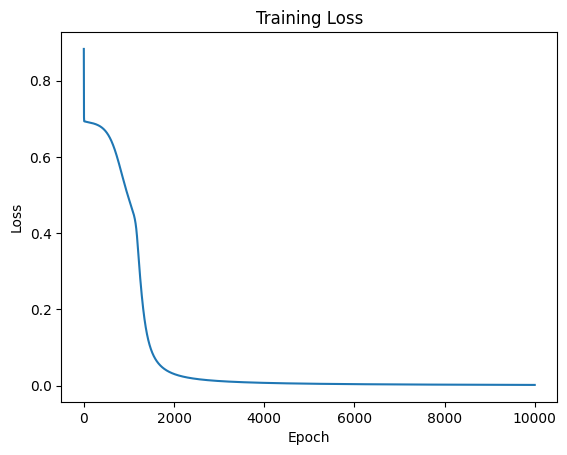

Predictions:
[[0.]
 [1.]
 [1.]
 [0.]]


In [19]:
# this numpy version is created by ChatGPT
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(314)

# XOR Data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

# Network Parameters
input_size = 2
hidden_size = 4
output_size = 1
learning_rate = 0.1
epochs = 10000

# Weight and bias initialization
theta1 = np.random.rand(input_size, hidden_size)
bias1 = np.random.rand(1, hidden_size)
theta2 = np.random.rand(hidden_size, output_size)
bias2 = np.random.rand(1, output_size)

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Binary cross entropy loss and its derivative
def binary_cross_entropy(Y, Y_pred):
    Y_pred = np.clip(Y_pred, 1e-12, 1 - 1e-12)  # Avoid division by zero
    return -np.mean(Y * np.log(Y_pred) + (1 - Y) * np.log(1 - Y_pred))

def forward(X):
    z1 = X.dot(theta1) + bias1
    a1 = sigmoid(z1)
    z2 = a1.dot(theta2) + bias2
    a2 = sigmoid(z2)
    return a1, a2

def backward(X, Y, a1, a2):
    m = Y.shape[0]
    dz2 = a2 - Y
    print(f"dz2: {dz2} type: {type(dz2)} shape: {dz2.shape}")
    dtheta2 = a1.T.dot(dz2) 
    dbias2 = np.sum(dz2, axis=0) 
    print(f"dbias2: {dbias2} type: {type(dbias2)} shape: {dbias2.shape}")
    dz1 = dz2.dot(theta2.T) * sigmoid_derivative(a1)
    print(f"dz1: {dz1} type: {type(dz1)} shape: {dz1.shape}")
    dtheta1 = X.T.dot(dz1) 
    dbias1 = np.sum(dz1, axis=0) 
    print(f"dbias1: {dbias1} type: {type(dbias1)} shape: {dbias1.shape}")
    return dtheta1, dbias1, dtheta2, dbias2

losses = []

for epoch in range(epochs):
    # Forward propagation
    a1, a2 = forward(X)
    # Compute loss
    loss = binary_cross_entropy(Y, a2)
    losses.append(loss)
    # Backward propagation
    dtheta1, dbias1, dtheta2, dbias2 = backward(X, Y, a1, a2)
    # Parameters update
    theta1 -= learning_rate * dtheta1
    bias1 -= learning_rate * dbias1
    theta2 -= learning_rate * dtheta2
    bias2 -= learning_rate * dbias2
    
    if (epoch+1) % 1000 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss}')

# Plot the training loss
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# Testing the neural network
a1, a2 = forward(X)
predictions = np.round(a2)
print("Predictions:")
print(predictions)


[[0.01583509 0.98327049 0.98583181 0.01345188]]
[[0. 1. 1. 0.]]


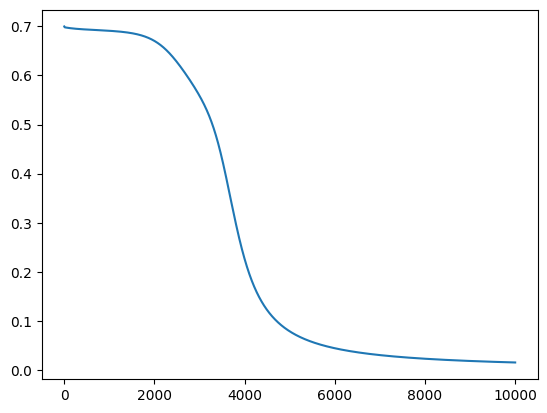

In [27]:
import numpy as np
from matplotlib import pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(314)
    W1 = np.random.randn(n_h, n_x)
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)
    b2 = np.zeros((n_y, 1))
    
    parameters = {"W1" : W1, "b1": b1,
                  "W2" : W2, "b2": b2}
    return parameters

def forward_propagation(X, Y, parameters):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = -np.sum(logprobs) / m
    return cost, cache, A2

def backward_propagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache
    
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis = 1, keepdims=True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1- A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    
    gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    return gradients

def update_parameters(parameters, grads, learning_rate):
    parameters["W1"] = parameters["W1"] - learning_rate * grads["dW1"]
    parameters["W2"] = parameters["W2"] - learning_rate * grads["dW2"]
    parameters["b1"] = parameters["b1"] - learning_rate * grads["db1"]
    parameters["b2"] = parameters["b2"] - learning_rate * grads["db2"]
    return parameters

np.random.seed(314)

X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
Y = np.array([[0, 1, 1, 0]]) # XOR
n_h = 2
n_x = X.shape[0]
n_y = Y.shape[0]
parameters = initialize_parameters(n_x, n_h, n_y)
num_iterations = 10000
learning_rate = 0.1
losses = np.zeros((num_iterations, 1))

for i in range(num_iterations):
    losses[i, 0], cache, A2 = forward_propagation(X, Y, parameters)
    grads = backward_propagation(X, Y, cache)
    parameters = update_parameters(parameters, grads, learning_rate)
    
cost, _, A2 = forward_propagation(X, Y, parameters)
pred = (A2 > 0.5) * 1.0
print(A2)
print(pred)
plt.figure()
plt.plot(losses)
plt.show()